In [1]:
import numpy as np
import pandas as pd

## Grid Approximation


In [ ]:
from scipy.stats import binom, uniform

# Define the range of number of heads and head probabilities
num_heads = np.arange(0, 101, 1) # We don't know nothing about the coin 
head_prob = np.arange(0, 1.01, 0.01) # 

# Create a DataFrame with all combinations of num_heads and head_prob " WE DON'T KNOW ANYTHING ABOUT THE COIN"
coin = pd.DataFrame([(x, y) for x in num_heads for y in head_prob], columns=["num_heads", "head_prob"])

# Calculate prior, likelihood, and posterior probabilities
coin["prior"] = uniform.pdf(coin["head_prob"]) # Since we don't know anything about the coin, we assume a uniform prior over the head probabilities
coin["likelihood"] = binom.pmf(coin["num_heads"], 100, coin["head_prob"])
coin["posterior_prob"] = coin["prior"] * coin["likelihood"]
coin["posterior_prob"] /= coin["posterior_prob"].sum()

In [ ]:
### What is the probability of getting 75 heads in 100 flips?

In [10]:
# Prior como não sei nada sobre a moeda, assumo uma distribuição uniforme para as probabilidades de cabeça
# Ou seja cada um das combinações aconteceram uma vez, ou seja, 1/101 para cada combinação de probabilidade de cabeça e número de cabeças
coin

,num_heads,head_prob,prior,likelihood,posterior_prob
0,0,0.00,1.0,1.000000,0.009901
1,0,0.01,1.0,0.366032,0.003624
2,0,0.02,1.0,0.132620,0.001313
3,0,0.03,1.0,0.047553,0.000471
4,0,0.04,1.0,0.016870,0.000167
...,...,...,...,...,...
10196,100,0.96,1.0,0.016870,0.000167
10197,100,0.97,1.0,0.047553,0.000471
10198,100,0.98,1.0,0.132620,0.001313
10199,100,0.99,1.0,0.366032,0.003624


<AxesSubplot: ylabel='Frequency'>

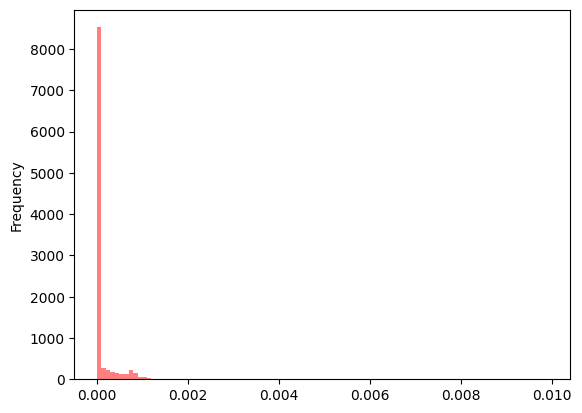

In [ ]:
heads75 = coin[coin["num_heads"] == 75

In [ ]:
# Generate 1000 tosses
tosses = np.random.binomial(1, 0.5, size=1000)

# Estimate the heads probability
heads_prob = get_heads_prob(tosses)

# Plot the distribution of heads probability
sns.kdeplot(heads_prob, shade=True, label="heads probability")
plt.show()